# Principal Components Analysis with Numpy

The objetive of this project is to manually perform PCA on a dataset from scratch using Numpy in order to gain a deeper understanding of the mathematics behind this algorithm. The ultimate goal is to choose a subset of features that explain most of the variance of the dataset and then project our data onto the the subspace spanned by this subset vectors.

### Task 1: Loading the data and libraries

For this project we will be using the renowned dataset iris. This is a multiple-dimensional dataset, so it would be interesting to see how much we can apply dimensionality reduction using PCA

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
# Setting the style of our plots

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9,6)

In [5]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# renaming the columns for readability:

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# dropping all the rows in which all elements are NA

iris.dropna(how = 'all', inplace = True)

In [10]:
# General information about the dataset

iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species_type  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Task 2: Visualizing Data

It's best practice to visualize the data before choosing and implementing any learning algorithm

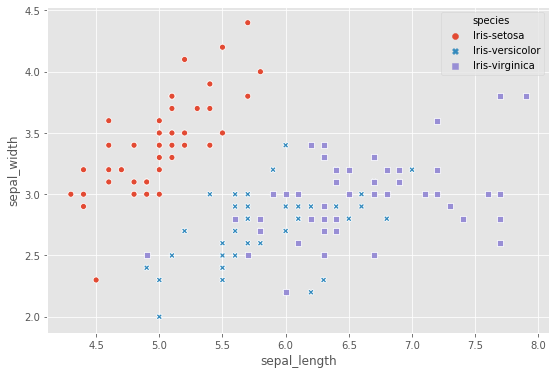

In [31]:
# Distribution of the data sepal width and length for different species

sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width, hue = iris.species, style = iris.species)

We can see that there is a lot of overlapping between the Iris-versicolor and Iris-virginica, so it's hard to tell them apart

### Task 3: Standardizing the data

In our dataset, the species of the flowers is the target that we would ideally want to predict using some sort
of classification algorithm.

It's capital to standardize the data in order to implement PCA, for that purpose we need first to center the data, that means substracting the mean to each of the dimensions so the different feature of our dataset has zero mean. 
The second step is to normalize each of the dimensions, meaning dividing it by their standard deviation to get rid of any discordance in units and giving them a variance of 1.

In [32]:
'''First we separate the dataset into a feature matrix (150x4), each row representing a sample of flower.
For that purpose we create two vectors, an x vector with the features and a y vector with the species.'''

x = iris.iloc[:, 0:4].values # We select all rows for the first 4 columns for the x vector
y = iris.species.values # Target vector

In [33]:
# We will standardize the data using the library sklearn.preprocessing:

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x) # This method centers and normalizes the data

### Task 4: Computing eigenvectors and eigenvalues

There are two ways to perform PCA, one is using Eigendecomposition and the other is using Singular Value Decomposition, we will use the latter but it's also interesting to perform the former to show how it works.

With PCA we aim to find linearly independent orthogonal axis also known as Principal Components. In this N dimensional space, we seek to project the datapoints onto these Principal Components, where the first PC captures the largest variance in the data along that axis.

The first Principal Component can be determined using the Eigendecomposition.

For this eigendecomposition we need to first calculate the covariance matrix:

$\text{Covariance: } \sigma_{jk} \frac{1}{n-1}\Sigma_{i = 1}^{N}(x_{ij}-\overline{x}_{j})(x_{ik}-\overline{x}_{k}) \\
\text{Covariance matrix: }\Sigma = \frac{1}{n-1}((X - \overline{x})^{T}(X - \overline{x}))$


In [35]:
# Create the covariance matrix:
covariance_matrix = np.cov(x.T)

print('Covariance matrix: \n', covariance_matrix)

Covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


The covariance matrix has the property that it is symmetric. We also constrain each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covariance matrix: $\Sigma = W \Lambda W^{-1}$ where $W$ are the eigenvectors and $\Lambda$ are the eigenvalues.

In [37]:
# To get eigenvectors and eigenvalues we use the following numpy.linalg built-in function:

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print('Eigenvalues: \n', eigen_values, '\n')
print('Eigenvectors: \n', eigen_vectors)

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 

Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Task 5: Singular Value Decomposition (SVD)

It's another method that ultimately serves the same purpose as the Eigendecomposition, but this one can also be used in matrices that are not squared

In [38]:
# To get the eigenvectors with SVD we use the following numpy.linalg built-in function:

eigen_vecs_svd, s, v = np.linalg.svd(x.T)

print('Eigenvectors: \n', eigen_vecs_svd)

Eigenvectors: 
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


There are some sign discordances between the two eigenvectors matrices but this is not important as we are interested in where these vectors lie and not that much about their direction

### Task 6: Picking Principal Components using the explained variance

The Eigendecomposition returned us 4 eigenvectors and 4 eigenvalues, we need to sort them by their eigenvalues, choosing the biggest ones

In [40]:
for val in eigen_values:
    print(val)

2.930353775589319
0.9274036215173412
0.14834222648163986
0.02074601399559597


In order to choose how many Principal Components we need to explain most of the variance we can calculate how many components are needed to explain at least 90% of the variance, for that we will calculate the variance explained for each of them and the acumulative variance explained.

In [59]:
variance_explained = [np.round((i/sum(eigen_values))*100,2) for i in eigen_values]
print(variance_explained, '\n')

cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[72.77, 23.03, 3.68, 0.52] 

[ 72.77  95.8   99.48 100.  ]


In [58]:
print('The first PC explains {}% of the variance \n'.format(variance_explained[0]))
print('The second PC explains {}% of the variance \n'.format(variance_explained[1]))
print('The first two PCs explain {}% of the variance'.format(variance_explained[0] + variance_explained[1]))

The first PC explains 72.77% of the variance 

The second PC explains 23.03% of the variance 

The first two PCs explain 95.8% of the variance


We can also represent it graphically for a better understanding

Text(0.5, 1.0, 'Explained Variance vs Number of Components')

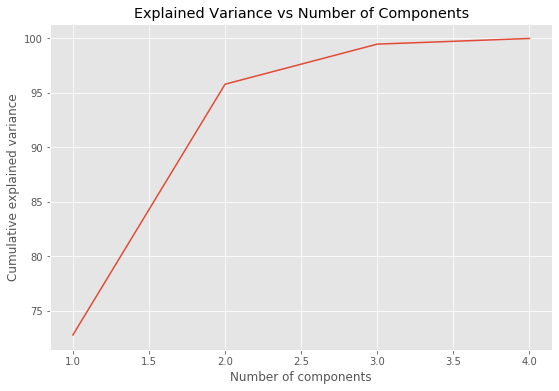

In [60]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs Number of Components')

### Task 7: Project data onto lower-dimensional linear subspace

In order to project the data onto the lower-dimensional linear subspace spanned by the subset of eigenvectors we previously chose (our PCs), we need to take the dot product of the data and this subset:

$X_{pca} = X \cdot W$

In [61]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

We create now a projection matrix using the first two eigenvectors as they explain more than the $95\%$ of the variance

In [63]:
projection_matrix = eigen_vectors[:, :2]
print('Projection Matrix: \n', projection_matrix)

Projection Matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


Now we create our PCA matrix calculating the dot product between our data and the projection matrix:

In [66]:
X_pca = x.dot(projection_matrix)

We are now able to plot our data on our Principal Components:

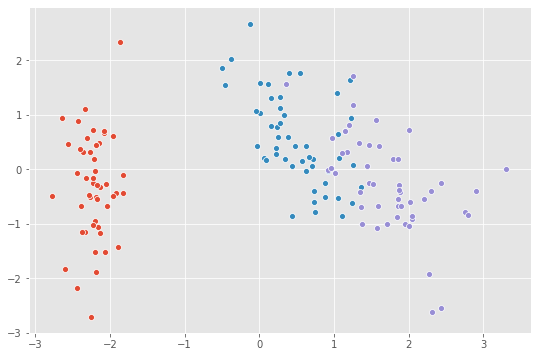

In [70]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
    sns.scatterplot(X_pca[y == species, 0],
                   X_pca[y == species, 1])